In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 解决matplotlib中文问题
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题


In [2]:
# 导入数据
df = pd.read_csv('heart.csv')

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
# age 年龄
# sex 性别 1=male,0=female
# cp  胸痛类型(4种) 值1:典型心绞痛，值2:非典型心绞痛，值3:非心绞痛，值4:无症状
# trestbps 静息血压 
# chol 血清胆固醇
# fbs 空腹血糖 >120mg/dl ,1=true; 0=false
# restecg 静息心电图(值0,1,2)
# thalach 达到的最大心率
# exang 运动诱发的心绞痛(1=yes;0=no)
# oldpeak 相对于休息的运动引起的ST值(ST值与心电图上的位置有关)
# slope 运动高峰ST段的坡度 Value 1: upsloping向上倾斜, Value 2: flat持平, Value 3: downsloping向下倾斜
# ca  The number of major vessels(血管) (0-3)
# thal A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
#        一种叫做地中海贫血的血液疾病(3 =正常;6 =固定缺陷;7 =可逆转缺陷)
# target 生病没有(0=no,1=yes)
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.target.value_counts()


1    165
0    138
Name: target, dtype: int64

Text(0.5, 0, '得病/未得病比例')

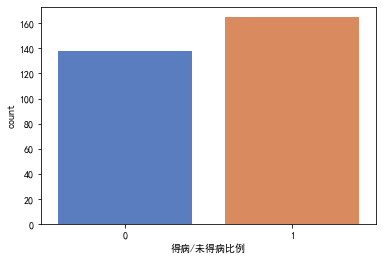

In [6]:
sns.countplot(x='target',data=df,palette="muted")
plt.xlabel("得病/未得病比例")


In [7]:
df.sex.value_counts()


1    207
0     96
Name: sex, dtype: int64

Text(0.5, 0, 'Sex (0 = 女, 1= 男)')

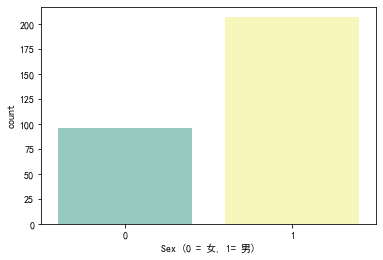

In [8]:
sns.countplot(x='sex',data=df,palette="Set3")
plt.xlabel("Sex (0 = 女, 1= 男)")


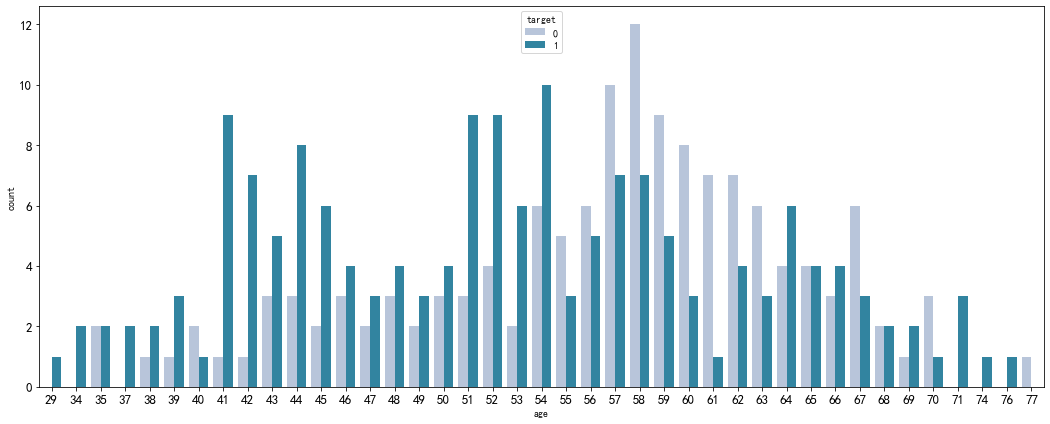

In [9]:
plt.figure(figsize=(18,7))
sns.countplot(x='age',data = df, hue = 'target',palette='PuBuGn',saturation=0.8)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()


In [10]:
first = pd.get_dummies(df['cp'], prefix = "cp")
second = pd.get_dummies(df['slope'], prefix = "slope")
thrid = pd.get_dummies(df['thal'], prefix = "thal")


In [11]:
df = pd.concat([df,first,second,thrid], axis = 1)
df = df.drop(columns = ['cp', 'slope', 'thal'])
df.head(3)


,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,1,0,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,1,0,0,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,1,0


In [12]:
y = df.target.values
X = df.drop(['target'], axis = 1)
X.shape


(303, 21)

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=6)  #随机种子6


In [14]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test) 


In [15]:
from sklearn.linear_model import LogisticRegression 

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
log_reg.score(X_train,y_train)


0.8810572687224669

In [17]:
log_reg.score(X_test,y_test)


0.8289473684210527

In [18]:
from sklearn.metrics import accuracy_score
y_predict_log = log_reg.predict(X_test)

# 调用accuracy_score计算分类准确度
accuracy_score(y_test,y_predict_log)


0.8289473684210527

In [19]:
param_grid = [
    {
        'C':[0.01,0.1,1,10,100],
        'penalty':['l2','l1'],
        'class_weight':['balanced',None]
    }
]


In [20]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(log_reg,param_grid,cv=10,n_jobs=-1)


In [21]:
%%time
grid_search.fit(X_train,y_train)


Wall time: 1.74 s


GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100],
                          'class_weight': ['balanced', None],
                          'penalty': ['l2', 'l1']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [22]:
grid_search.best_estimator_


LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
grid_search.best_score_


0.8545454545454545

In [24]:
grid_search.best_params_


{'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2'}

In [25]:
log_reg.score(X_test,y_test)


0.8289473684210527

In [26]:
from sklearn.metrics import f1_score

f1_score(y_test,y_predict_log)


0.8470588235294118

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_log))


              precision    recall  f1-score   support

           0       0.87      0.75      0.81        36
           1       0.80      0.90      0.85        40

    accuracy                           0.83        76
   macro avg       0.84      0.82      0.83        76
weighted avg       0.83      0.83      0.83        76



In [28]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test,y_predict_log)
cnf_matrix


array([[27,  9],
       [ 4, 36]], dtype=int64)

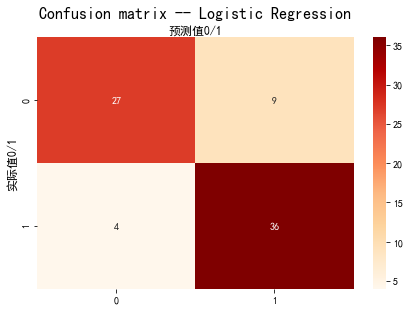

In [29]:
def plot_cnf_matirx(cnf_matrix,description):
    class_names = [0,1]
    fig,ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks,class_names)
    plt.yticks(tick_marks,class_names)

#create a heat map
    sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'OrRd',
               fmt = 'g')
    ax.xaxis.set_label_position('top')
    plt.tight_layout()
    plt.title(description, y = 1.1,fontsize=16)
    plt.ylabel('实际值0/1',fontsize=12)
    plt.xlabel('预测值0/1',fontsize=12)
    plt.show()
    
plot_cnf_matirx(cnf_matrix,'Confusion matrix -- Logistic Regression')


In [30]:
decision_scores = log_reg.decision_function(X_test)

from sklearn.metrics import precision_recall_curve

precisions,recalls,thresholds = precision_recall_curve(y_test,decision_scores)


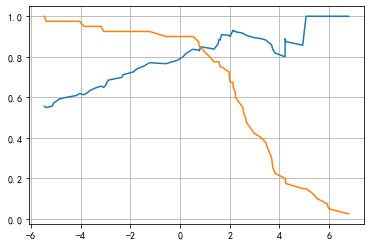

In [31]:
plt.plot(thresholds,precisions[:-1])
plt.plot(thresholds,recalls[:-1])
plt.grid()
plt.show()    #没有从最小值开始取,sklearn自己从自己觉得ok的位置开始取


In [32]:
from sklearn.metrics import roc_curve

fprs,tprs,thresholds = roc_curve(y_test,decision_scores)


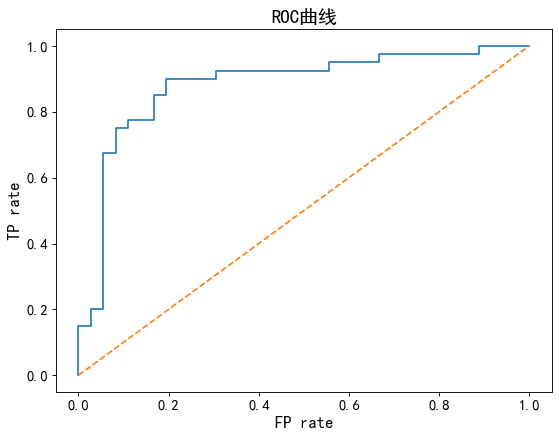

In [33]:
def plot_roc_curve(fprs,tprs):
    plt.figure(figsize=(8,6),dpi=80)
    plt.plot(fprs,tprs)
    plt.plot([0,1],linestyle='--')
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.ylabel('TP rate',fontsize=15)
    plt.xlabel('FP rate',fontsize=15)
    plt.title('ROC曲线',fontsize=17)
    plt.show()
    
plot_roc_curve(fprs,tprs)


In [34]:
# 求面积,相当于求得分
from sklearn.metrics import roc_auc_score  #auc:area under curve

roc_auc_score(y_test,decision_scores)


0.8805555555555555